# 2 随机网络

## 2.1 随机图

- Erdös-Rényi图（ER图）的特点是包含两个参数：$n$是节点的个数，$p$是任何两个节点之间存在一条边的概率。
- Erdös和Rényi研究了这些随机图的属性，一个令人惊奇的研究结果是，随着随机边的增加，随机图的性质会发生突变。
- 显示这种突变的属性之一是连通性。在ER图中，当$p$小的时候，图被连通的概率很小；当$p$大的时候，图被连通的概率接近1。在这两种体系之间，在一个特定的$p$值（$p^*$）处有一个快速突变。
- Erdös和Rényi表明这个关键值$p*=(\ln n)/n$。一个随机图，$G(n,p)$，在$p<p^*$时不太可能是连通的，在$p>p^*$时很可能是连通的。
- 为了测试这种说法，我们将开发生成随机图的算法，并检查它们是否连通。

In [1]:


import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## 2.2 生成图

- 为了生成完全图，我们使用了一个遍历所有节点对的生成器函数。

In [2]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

- 定义 `make_complete_graph` 函数生成一个用给定节点数和所有节点对之间的边数的图

In [3]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

- 下面是一个包含10个节点的完整图

In [4]:
complete = make_complete_graph(10)
complete.number_of_nodes()

10

下面是一个包含50个节点的完全图

In [5]:
complete2 = make_complete_graph(50)
complete2.number_of_nodes()

50

- 绘制完全图

绘制一幅新的完全图，底下的报错原因是储存问题，不是输出结果的问题

(-1.2099999789237978,
 1.209999997997284,
 -1.2076123376159553,
 1.2076123226354267)

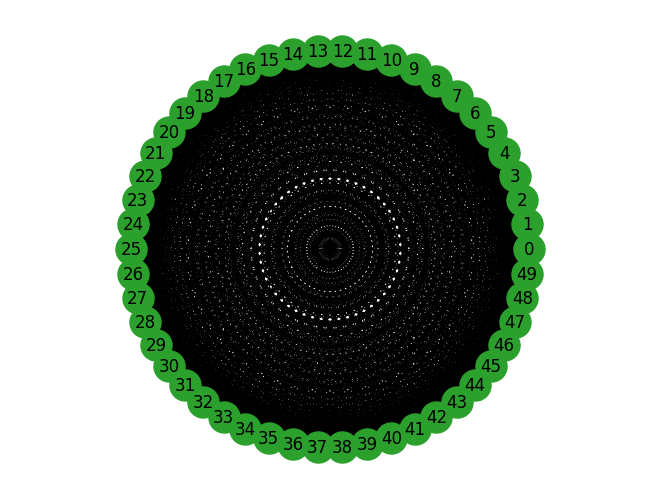

In [6]:
nx.draw_circular(complete2,
                 node_color='C2', 
                 node_size=500, 
                 with_labels=True)
plt.axis('equal')


(-1.2099999868273736,
 1.2099999987483026,
 -1.1507783259899071,
 1.1507784150000355)

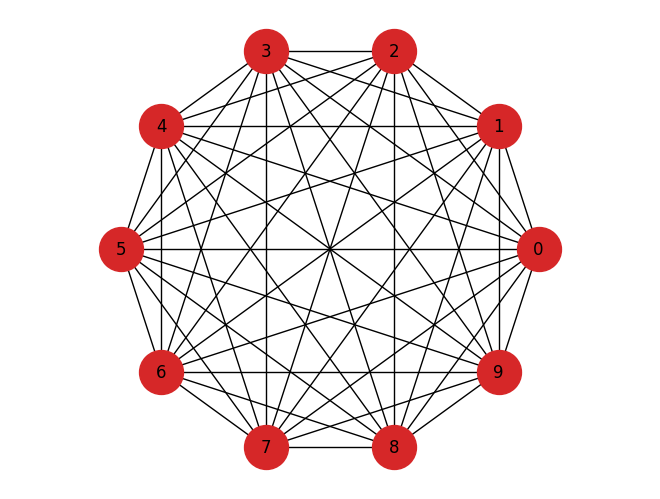

In [7]:
nx.draw_circular(complete,
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)
plt.axis('equal')

## 2.3 连通图

- 假设我们从节点s开始。我们可以将s标记为“seen”并标记它的相邻节点。
- 然后我们标记相邻节点的相邻节点，以此类推，直到我们无法到达更多的节点为止。
- 如果所有节点都被访问，则图是连通的。

In [8]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

- reachable_nodes接受一个图和一个起始节点start，从起始节点开始，并返回可以从起始节点到达的节点集。
- 最初，这个集合seen是空的，我们创建一个名为stack（栈）的列表，它跟踪我们已经发现但尚未处理的节点。最初，栈只包含一个节点start。
- 现在，每次在循环中，我们：
  1. 从栈中删除一个节点。
  2. 如果节点已在seen中，则返回步骤1。
  3. 否则，我们将节点添加到seen，并将其相邻节点添加到栈中。
- 当堆栈为空时，我们不能再到达任何节点，因此终止循环并返回seen。

- 我们可以在完全图中找到从节点0可以到达的所有节点。

In [9]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

接下来是第二个图的节点

In [10]:
reachable_nodes(complete2, 0)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49}

- 我们使用reachable_nodes来编写is_connected判断一个图是否连通。

In [11]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

- 判断完全图是否连通。

In [12]:
is_connected(complete)

True

判断第二个完全图是否连通

In [13]:
is_connected(complete2)

True

## 2.4 ER图
- 随机图（ER图）$G(n,p)$包含$n$个节点，每对节点由概率为$p$的边连接。生成ER图与生成完全图类似。

In [14]:
def flip(p):
    return np.random.random() < p

- 定义`random_pairs`生成器函数枚举了所有可能的边，并选择哪些边应该添加到图中。

In [15]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

- 定义`make_random_graph`生成并返回ER图$G(n,p)$。

In [16]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

- 下面是一个$n=10,p=0.3$的例子。

In [17]:
np.random.seed(10)

random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

12

(-1.2099999868273736,
 1.2099999987483026,
 -1.1507783259899071,
 1.1507784150000355)

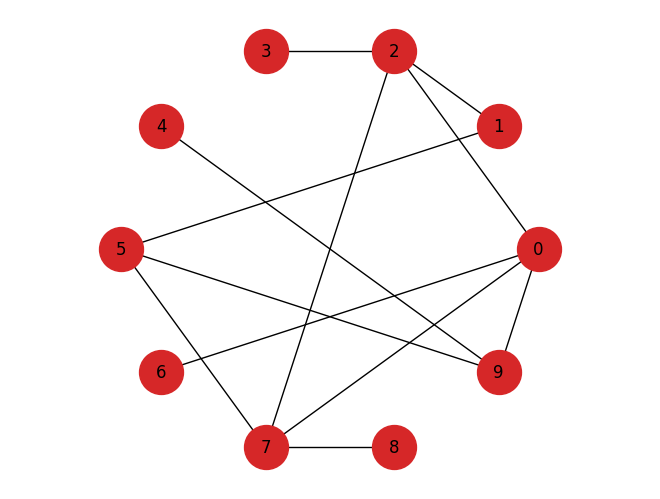

In [18]:
# plt.figure(figsize=(5,5)) 
nx.draw_circular(random_graph, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)
plt.axis('equal')

下面是一个n=30，p=0.2的例子

In [19]:
np.random.seed(30)

random_graph2 = make_random_graph(30, 0.2)
len(random_graph2.edges())

92

以下是50个点的图例

(-1.2099999978045624,
 1.2099999997913837,
 -1.2033715042106379,
 1.203371529907038)

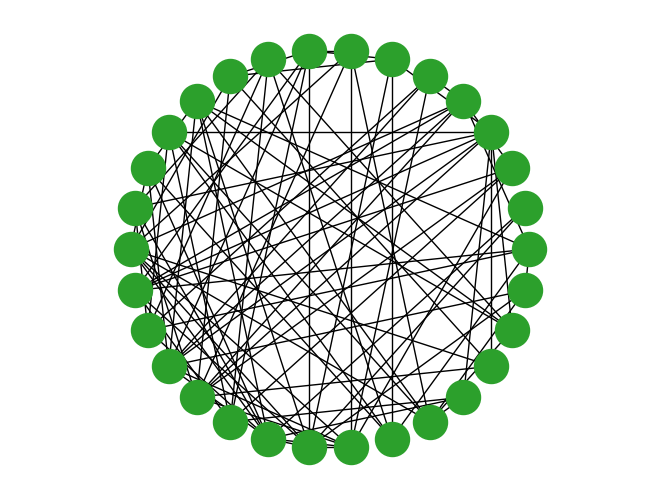

In [27]:
# plt.figure(figsize=(5,5)) 
nx.draw_circular(random_graph2, 
                 node_color='C2', 
                 node_size=600, 
                 with_labels=False)
plt.axis('equal')

- 绘制ER图

(-1.2099999868273736,
 1.2099999987483026,
 -1.1507783259899071,
 1.1507784150000355)

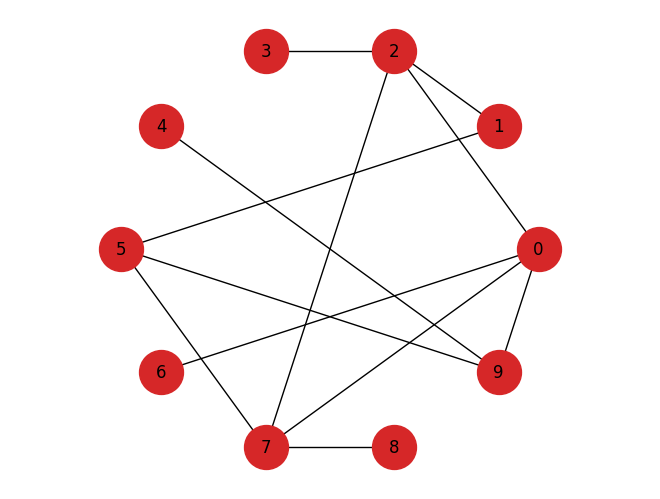

In [22]:
# plt.figure(figsize=(5,5)) 
nx.draw_circular(random_graph, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)
plt.axis('equal')

绘制Graph2的ER图

(-1.2099999978045624,
 1.2099999997913837,
 -1.2033715042106379,
 1.203371529907038)

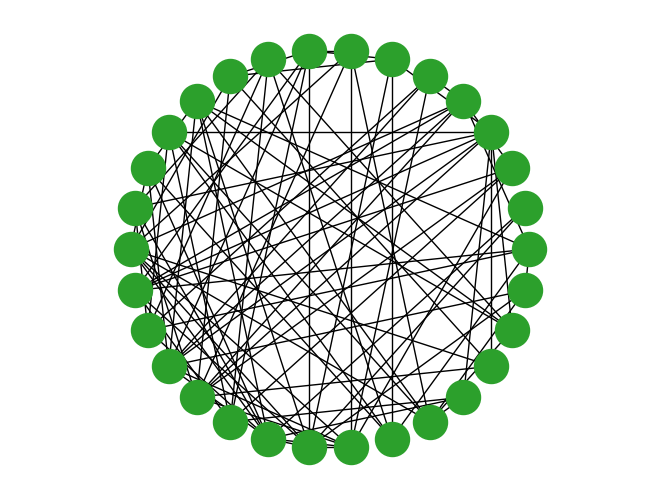

In [26]:
# plt.figure(figsize=(5,5)) 
nx.draw_circular(random_graph2, 
                 node_color='C2', 
                 node_size=600, 
                 with_labels=False)
plt.axis('equal')

- 判断ER图是否连通。

判断原图是否连通

In [23]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

判断第二幅图是否连通

In [24]:
reachable_nodes(random_graph2, 0)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29}

- 以较小的概率`p`生成ER图。

In [28]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

8

In [29]:
is_connected(random_graph)

False

## 2.5 连通的概率
- 对于给定的$n$值和$p$值，我们想知道$G(n,p)$连通的概率。我们可以通过生成大量随机图并计算有多少图是连通的来估算它。

In [30]:
# version with a for loop

def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

In [31]:
# version with a list comprehension

def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
          for i in range(iters)]
    return np.mean(tf)

- 设置$n=10,p=0.23$, 连通的概率大约是$33\%$。

In [32]:
np.random.seed(17)

n = 10
prob_connected(n, 0.23, iters=10000)

0.3393

n=100， p=0.15的状况

In [33]:
np.random.seed(18)

n = 100
prob_connected(n, 0.15, iters=10000)

1.0

- 根据Erdös-Rényi模型，$p^*=\ln n/n=0.23$。

In [34]:
pstar = np.log(n) / n
pstar

0.04605170185988092

- 通过估计一系列$p$值的连通概率，我们可以更清楚地了解这种突变。

In [35]:
ps = np.logspace(-1.3, 0, 11)
ps

array([0.05011872, 0.0676083 , 0.09120108, 0.12302688, 0.16595869,
       0.22387211, 0.30199517, 0.40738028, 0.54954087, 0.74131024,
       1.        ])

- 设置`iters=1000`估计连通概率。
- 对于数组`ps`中$p$的每个值，我们计算具有参数$p$的图形连通的概率，并将结果存储在`ys`中。

In [33]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.05011872336272722 0.545
0.06760829753919818 0.911
0.09120108393559097 0.991
0.12302687708123815 0.999
0.16595869074375605 1.0
0.22387211385683395 1.0
0.3019951720402016 1.0
0.40738027780411273 1.0
0.5495408738576245 1.0
0.7413102413009173 1.0
1.0 1.0


- 绘制连通概率图，并添加临界值$p^*$。

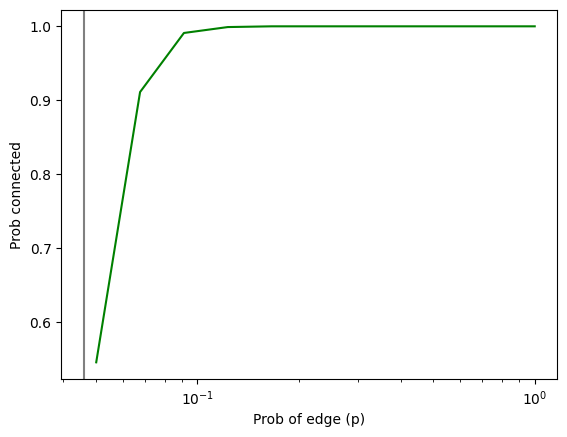

In [36]:
plt.axvline(pstar, color='gray')
plt.plot(ps, ys, color='green')
plt.xlabel('Prob of edge (p)')
plt.ylabel('Prob connected')
plt.xscale('log')
# decorate(xlabel='Prob of edge (p)',
#                  ylabel='Prob connected',
#                  xscale='log')


- 绘制$n$值增加时的类比结果。
- 随着$n$的增加，临界值越小，突变越突然。

300
100
30


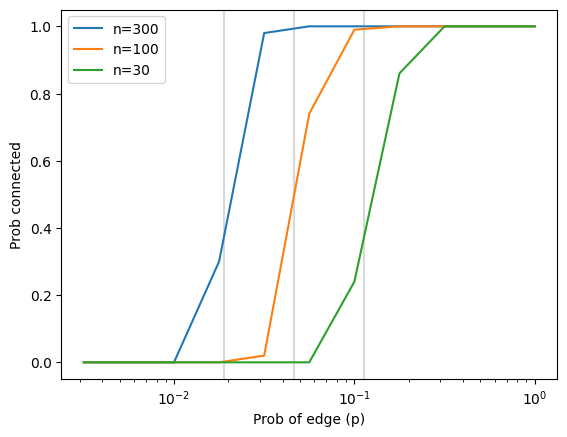

In [38]:
ns = [300, 100, 30]
ps = np.logspace(-2.5, 0, 11)

# sns.set_palette('Blues_r', 4)
for n in ns:
    print(n)
    pstar = np.log(n) / n
    plt.axvline(pstar, color='gray', alpha=0.3)

    ys = [prob_connected(n, p) for p in ps]
    plt.plot(ps, ys, label='n=%d' % n)
    
plt.xlabel('Prob of edge (p)')
plt.ylabel('Prob connected')
plt.xscale('log')
plt.xlim=[ps[0], ps[-1]]
plt.loc='upper left'
plt.legend()

# decorate(xlabel='Prob of edge (p)',
#          ylabel='Prob connected',
#          xscale='log', 
#          xlim=[ps[0], ps[-1]],
#          loc='upper left')


改变n值后的图片

600
100
6


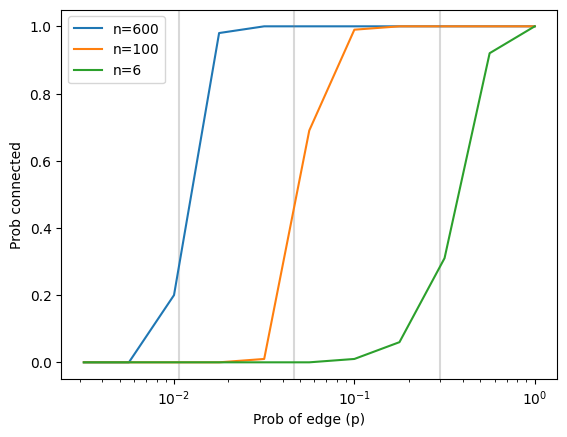

In [39]:
ns = [600, 100, 6]
ps = np.logspace(-2.5, 0, 11)

# sns.set_palette('Blues_r', 4)
for n in ns:
    print(n)
    pstar = np.log(n) / n
    plt.axvline(pstar, color='gray', alpha=0.3)

    ys = [prob_connected(n, p) for p in ps]
    plt.plot(ps, ys, label='n=%d' % n)
    
plt.xlabel('Prob of edge (p)')
plt.ylabel('Prob connected')
plt.xscale('log')
plt.xlim=[ps[0], ps[-1]]
plt.loc='upper left'
plt.legend()